# Data
https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews

Dataset of restaurant reviews with 10000 rows and 8 columns

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df = pd.read_csv('../data/restaurant_reviews.csv')

In [3]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [5]:
df.loc[df['Rating'] == 'Like', 'Rating'] = 5
df['Rating'] = df['Rating'].astype(float)

For simplification, we stay only review and rating columns.
Also, we create new column 'is_happy', where if rating >= 4 that customer was happy (1), else he was sad (0)


In [6]:
df['is_happy'] = (df['Rating'] >= 4).astype(int)

In [7]:
df['is_happy'].value_counts()

1    6275
0    3725
Name: is_happy, dtype: int64

In [8]:
df = df[['Review','is_happy']]

In [9]:
df.dropna(inplace=True) # drop empty reviews

In [10]:
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].apply(lambda x: ''.join([re.sub(r'[^a-zA-Z\s]', '', i) for i in x])) # drop punctuation

In [11]:
df.shape

(9955, 2)

In [12]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

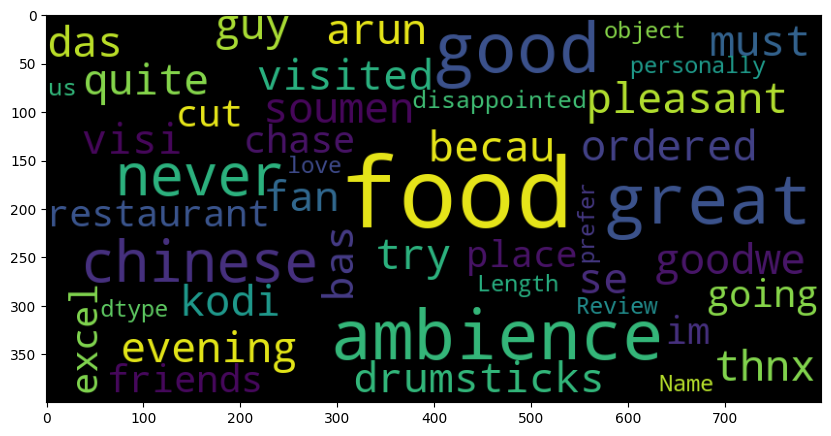

In [13]:
plt.figure(figsize=(10, 7))
wordcloud.generate(str(df[df['is_happy'] == 1]['Review']))
plt.imshow(wordcloud);

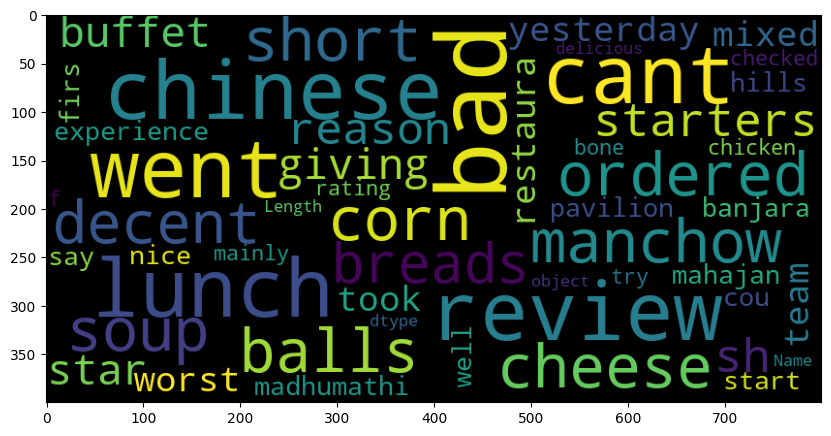

In [14]:
plt.figure(figsize=(10, 7))
wordcloud.generate(str(df[df['is_happy'] == 0]['Review']))
plt.imshow(wordcloud);

# Model baseline

We want to highlight important words for good or bad customer review

In [15]:
X, y = df['Review'], df['is_happy']

In [16]:
tf_idf = TfidfVectorizer(ngram_range=(1, 5), max_features=100000)
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs', random_state=17, verbose=1)
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [17]:
scores = cross_val_score(tfidf_logit_pipeline, X, y, cv=3, scoring='roc_auc', verbose=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       100001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59972D+03    |proj g|=  8.61000D+02


 This problem is unconstrained.



At iterate   50    f=  2.56164D+03    |proj g|=  3.79237D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     54     63      1     0     0   2.009D-02   2.562D+03
  F =   2561.6446543090015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       100001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60042D+03    |proj g|=  8.60500D+02


 This problem is unconstrained.



At iterate   50    f=  2.52138D+03    |proj g|=  8.53886D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     52     58      1     0     0   3.523D-02   2.521D+03
  F =   2521.3782189935964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       100001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60042D+03    |proj g|=  8.61500D+02


 This problem is unconstrained.



At iterate   50    f=  2.51663D+03    |proj g|=  1.91932D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     53     61      1     0     0   3.799D-03   2.517D+03
  F =   2516.6282392932435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [18]:
scores, round(scores.mean(), 2)

(array([0.95258408, 0.94060966, 0.93876308]), 0.94)

In [19]:
tfidf_logit_pipeline.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       100001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90028D+03    |proj g|=  1.29150D+03


 This problem is unconstrained.



At iterate   50    f=  3.55273D+03    |proj g|=  5.11443D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     65     75      1     0     0   5.744D-02   3.553D+03
  F =   3552.7261055309709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=100000, ngram_range=(1, 5))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

# Results

In [20]:
feature_names=tfidf_logit_pipeline.named_steps['tf_idf'].get_feature_names_out()
feats = pd.DataFrame({i:[j] for i,j in zip(feature_names,tfidf_logit_pipeline['logit'].coef_[0])}).T
feats = feats.sort_values(0, ascending=False, key=lambda x: abs(x))

In [21]:
feats.head(10)

,0
not,-9.475114
worst,-6.273362
bad,-5.353264
awesome,5.091517
best,4.527310
amazing,4.385517
great,4.209711
no,-3.975932
average,-3.776974
and,3.763588


let's highlight words in some big review

In [22]:
df['Review'].apply(lambda x: len(x)).max()

5094

In [23]:
df[df['Review'].apply(lambda x: len(x)) == 5094]['is_happy'].values # it's happy review

array([1])

In [24]:
example_review = df[df['Review'].apply(lambda x: len(x)) == 5094]['Review'].values[0]

In [25]:
tfidf_logit_pipeline.predict_proba(np.array([example_review]))[:,1]

array([0.81964786])

Our model predicted happiness of this review with probability of 82%

We want to have important combination of words (more than 3 words here)

In [26]:
transform_review = tfidf_logit_pipeline['tf_idf'].transform(np.array([example_review]))
words_imp = [i for i in feature_names[transform_review.nonzero()[1]] if len(i.split()) >= 3]

In [27]:
list(feats[feats.index.isin(words_imp)].head(15).index)

['one of the',
 'is very good',
 'was really good',
 'good amount of',
 'but it was',
 'for the food',
 'coming to the',
 'hard to chew',
 'they also have',
 'was the best',
 'you get the',
 'compared to the',
 'added to the',
 'biryani it was',
 'the mutton biryani']

In [28]:
search_words = feats[feats.index.isin(words_imp)].sort_values(0, ascending=True, key=lambda x: abs(x)).head(20).index
for search_word in search_words:
    if search_word in example_review:
        example_review = example_review.replace(search_word, '\033[44;33m{}\033[m'.format(search_word))

In [29]:
print(example_review)

hyderabadi daawat as the name suggests has some authentic hyderabadi food which you get to eat in the functions here in hyderabad ever been to a hyderabadi daawat before no not the hotel were talking about a function well if youve been to one then you definitely know how much a hyderabadi loves food and how much he spends on the menu and here at hyderabadi daawat the restaurant you get the same splendid variety of dishes to enjoy the hotel is very easy to locate its on the main roadwhile coming from orr or gachibowli side it comes on the right side and if youre coming from miyapur side then it will be on your left the restaurant has simple yet beautiful interiors very calm and cozy place they also have banquet hall and a conference hall and they also undertake catering orders for parties and functions and after the dastar was set we sat down for the food and they first brought the yakhni shorba shorba is nothing but the soup yakhni shorba is a dish from kashmirpeople in the north tend 

Now we have text with highlighted key combinations of words, which influence on happiness of review